In [48]:
import pandas as pd
import os
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.read_csv('AGGREGATED_DATA_mobile_developer_london.csv')

In [51]:
df.shape

(3870, 16)

In [52]:
df = df.drop('Unnamed: 0', axis=1)

In [53]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [54]:
pd.DataFrame(df['position'].value_counts()).reset_index()

,index,position
0,software development engineer,156
1,android developer,152
2,ios developer,123
3,senior android engineer,67
4,android engineer,59
5,senior ios developer,44
6,senior ios engineer,43
7,ios engineer,41
8,senior software engineer,33
9,java developer,32


In [55]:
df['position'] = df['position'].apply(lambda x: x.lower())
df['descriptions'] = df['descriptions'].apply(lambda x: x.lower())

In [56]:
def filter_df(x, y):
    if ('mobile' in x) or ('android' in x) or ('ios' in x) or ('swift' in x) or ('kotlin' in x) :
        return "keep"
    else:
        if ('android' in y) or ('ios' in y) or ('mobile development' in y) or ('mobile developer' in y):
            return 'keep'
        elif ('swift' in y) or ('kotlin' in y):
            return 'keep'
        else:
            return 'remove'      

In [57]:
df['new_filter'] = list(map(filter_df, df['position'], df['descriptions']))

In [63]:
remove = df[df['new_filter']=='remove'].reset_index(drop=True)
remove['descriptions'][5]

'the equities derivatives front office flow technology team is developing the best in class pricing quoting and market view application for use by our internal trading and sales enabling them to respond to clients requests for quotes as well as automate their end to end workflow we re looking for a talented software engineer to join our london team who will help drive the automation agenda further through integration of our workflow into new innovative ai ml led autopricers the role offers a range of interesting opportunities close collaboration with a number of teams including trading sales quantitative research as well as other technology teams for building new capability into the system taking part in a new strategy to automate front office processes and functions using technology solutions an agile and delivery focused team working with global and local counterparts leveraging best in class technologies to solve business problems opportunity to propose and explore new solutions tha

In [64]:
df = df[df['new_filter']=='keep'].reset_index(drop=True)
df = df.drop(['new_filter'], axis=1)

In [65]:
df.shape

(2722, 15)

In [ ]:
def clean_dates_posted(x):
    

In [96]:
df['date_posted'].value_counts()

1 week ago        602
1 month ago       425
2 weeks ago       373
3 weeks ago       270
5 days ago        168
3 days ago        143
4 days ago        119
6 days ago        111
4 weeks ago        77
1 day ago          55
2 days ago         54
1 hour ago         26
3 hours ago        21
7 hours ago        20
2 hours ago        19
5 hours ago        18
2 months ago       17
6 hours ago        17
10 hours ago       16
4 hours ago        14
9 hours ago        13
19 hours ago       13
12 hours ago       13
15 hours ago       13
14 hours ago       12
8 hours ago        11
11 hours ago       10
23 hours ago        8
13 hours ago        8
21 hours ago        8
17 hours ago        7
16 hours ago        7
18 hours ago        6
3 months ago        4
22 hours ago        4
20 hours ago        3
4 months ago        3
5 months ago        2
14 minutes ago      2
58 minutes ago      2
41 minutes ago      1
26 minutes ago      1
52 minutes ago      1
7 minutes ago       1
46 minutes ago      1
47 minutes

# Top Companies Hiring

In [66]:
temp = pd.DataFrame(df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
temp.head(30)

,company_name,number of postings
0,client server,139
1,google,122
2,amazon,100
3,jefferson frank,86
4,picsart,57
5,toptal,47
6,agoda,45
7,pulselive,42
8,asos.com,37
9,facebook,36


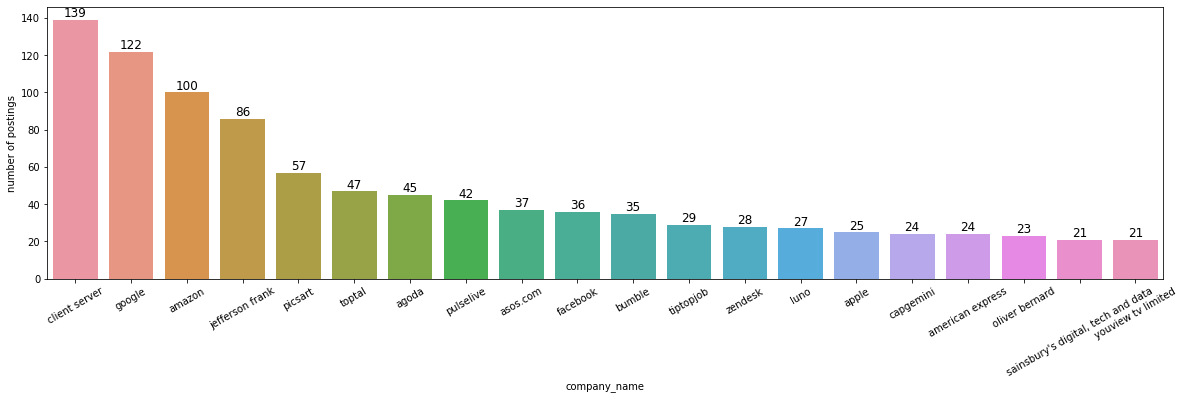

In [67]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions 

In [68]:
top_positions = pd.DataFrame(df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
top_positions

,position,count
0,android developer,152
1,ios developer,123
2,senior android engineer,67
3,software development engineer,63
4,android engineer,59
5,senior ios developer,44
6,senior ios engineer,43
7,ios engineer,41
8,software engineer android,30
9,senior product designer,28


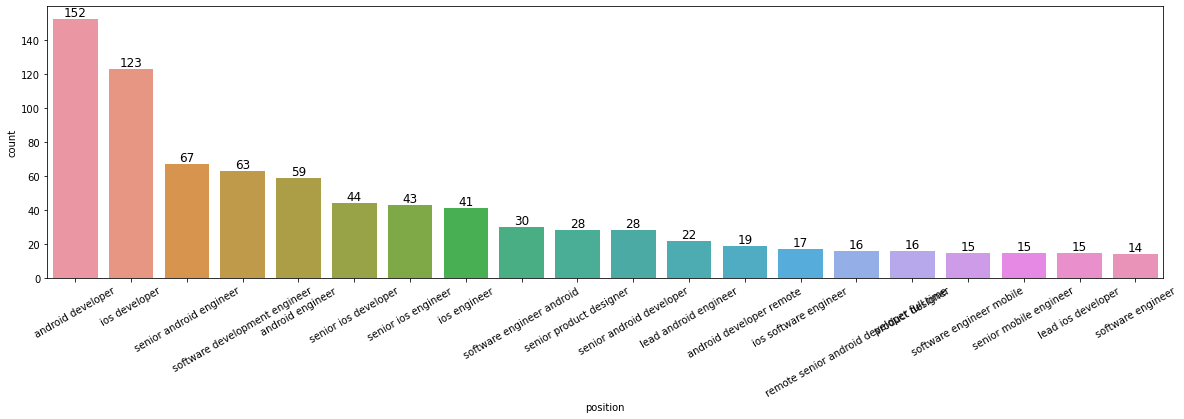

In [69]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [70]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [71]:
top_skills = []
for row_content in df['top competitive skills']:
    row_content = row_content.replace('/', ' ').replace('-', ' ')
    if len(row_content) > 3:
        try:
            for item in re.findall('\w+ \w+ \w+', row_content):  # Skills with 3 words
                top_skills.append(item)
            for item in re.findall('\w+ \w+', row_content):  # Skills with 2 words
                top_skills.append(item)
            for item in re.findall('\'\w+\'', row_content):  # Skill with single word
                top_skills.append(re.findall('\w+', item)[0])
        except TypeError:
            pass

top_skills = [item.lower() for item in top_skills]

In [72]:
def clean_skill(x):
    if ('cascading' in x) or ('css' in x):
        return 'css'
    elif 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    elif 'sql' in x:
        return'sql'
    elif 'object oriented' in x:
        return 'object oriented programing'
    elif 'back end' in x:
        return 'back end'
    elif 'front end' in x:
        return 'front end'
    elif ('full stack' in x) or ('fullstack' in x):
        return 'full stack'
    elif 'user interface' in x:
        return 'user interface design'
    elif 'php' in x:
        return 'php'
    elif 'model view' in x:
        return 'model view'
    elif 'programming' in x:
        return 'programming language'
    elif 'azure' in x:
        return 'azure'
    elif 'web design' in x:
        return 'web design'
    elif ('software project' in x) or ('project management' in x):
        return 'project management'
    elif 'java database' in x:
        return 'java database'
    elif 'sap' in x:
        return 'sap'
    elif 'apis' in x:
        return 'apis'
    else:
        return x  

In [73]:
top_skills = pd.Series(top_skills).apply(clean_skill)

# Top Skills of the candidates who applied for the job

In [74]:
x = pd.DataFrame(pd.DataFrame(top_skills).value_counts())
x.columns = ['count']
x = x.reset_index()
x.columns = ['skill', 'count']
x = x[x['count']> 7]
x

,skill,count
0,sql,1107
1,android,846
2,programming language,626
3,css,534
4,javascript,452
5,ios,436
6,java,394
7,model view,374
8,object oriented programing,336
9,html,240


In [75]:
'swift' in x['skill']

False

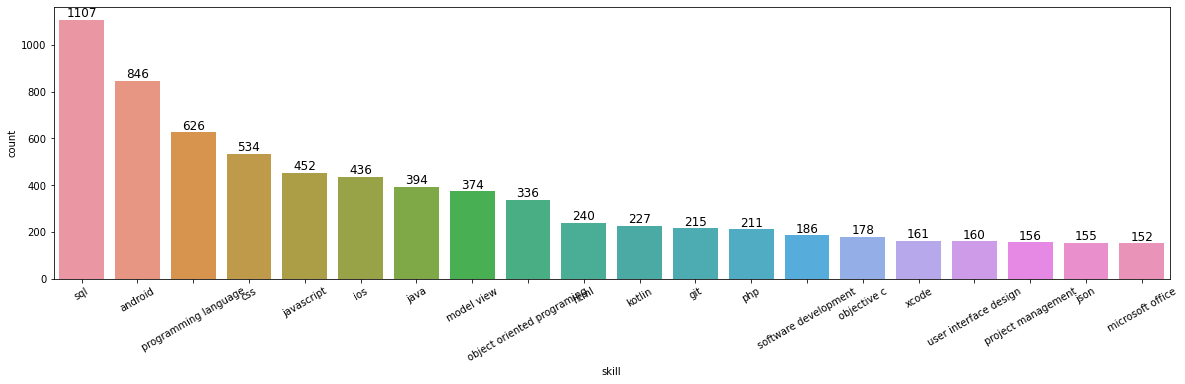

In [76]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=x.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [77]:
skills = x['skill']
skills = list(skills.values)

In [78]:
skills.append('swift')

In [79]:
other_skills = ['xamarin', 'appcelerator', 'cordova', 'phonegap', 'buildfire', 'ionic', 'android sdk', 
               'android studio', 'angular', 'objective-c', 'dart', 'lua', 'rust' ,'action script' ,
               'mobile design']

In [80]:
skills = skills + other_skills

# Top Skills Asked by the employers

In [81]:
import re

In [82]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter

In [83]:
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']

In [84]:
skills_count

,skill,count
0,design,1973
1,android,1920
2,ios,1748
3,unity,1686
4,engineering,1259
5,java,1140
6,git,1120
7,testing,967
8,communication,914
9,management,878


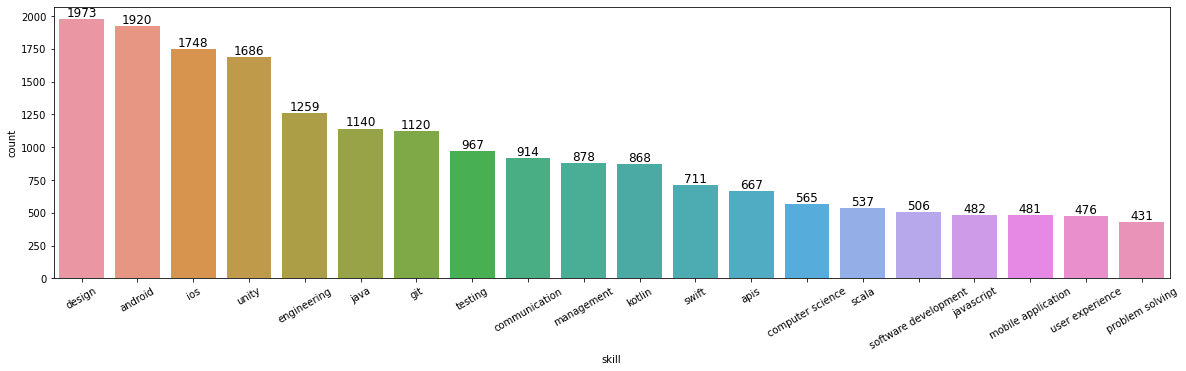

In [85]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [86]:
## Next analysis : Top skills for iOS jobs and for Android Jobs 

In [87]:
df['position'].value_counts()

android developer                                                            152
ios developer                                                                123
senior android engineer                                                       67
software development engineer                                                 63
android engineer                                                              59
senior ios developer                                                          44
senior ios engineer                                                           43
ios engineer                                                                  41
software engineer android                                                     30
senior product designer                                                       28
senior android developer                                                      28
lead android engineer                                                         22
android developer remote    

In [88]:
def iOS_android_positions(x):
    if 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    else:
        return 'other'    

In [89]:
df['platform'] = df['position'].apply(iOS_android_positions)

# iOS Analysis

In [90]:
ios_df = df[df['platform']=='ios']
ios_df.shape

(533, 16)

In [91]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
skills_count_ios

,skill,count
0,ios,478
1,swift,423
2,design,345
3,unity,314
4,git,222
5,objective c,213
6,engineering,194
7,testing,180
8,apis,172
9,communication,139


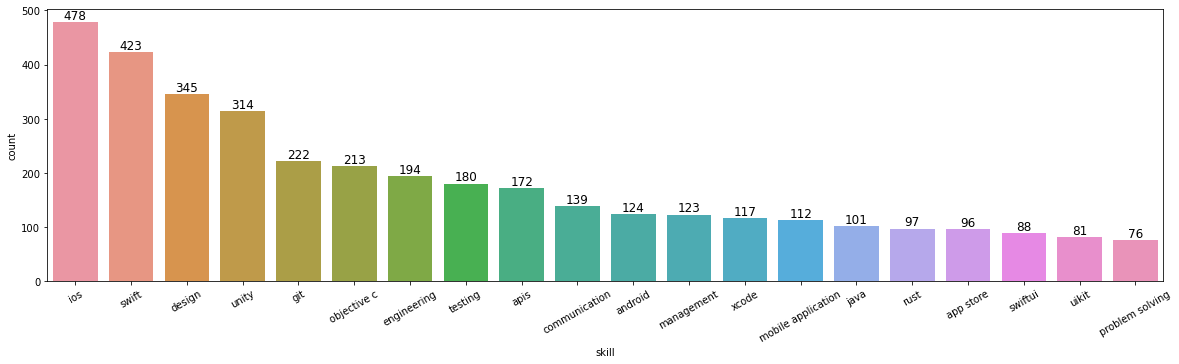

In [92]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

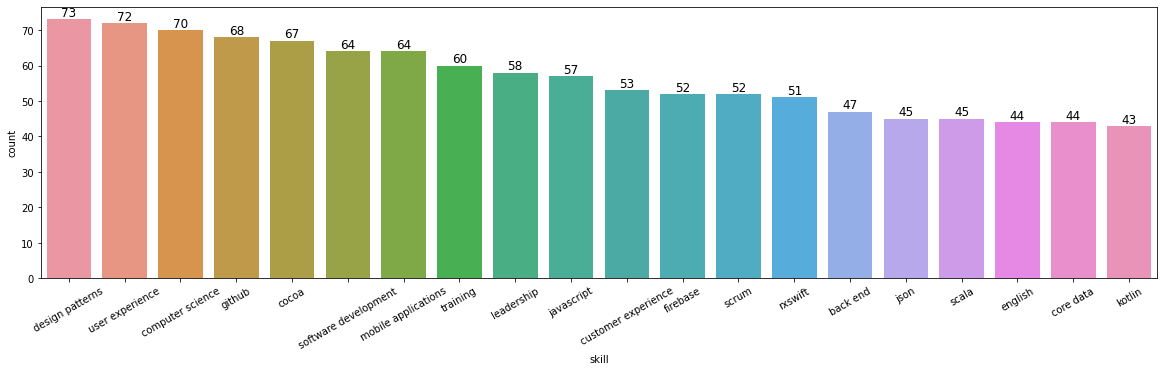

In [93]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.iloc[20:40])
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies iOS

In [94]:
top_companies_ios = pd.DataFrame(ios_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
top_companies_ios

,company_name,number of postings
0,client server,31
1,jefferson frank,20
2,tiptopjob,16
3,pulselive,15
4,facebook,12
5,nutmeg,11
6,oliver bernard,11
7,asos.com,10
8,apple,10
9,fierlo,10


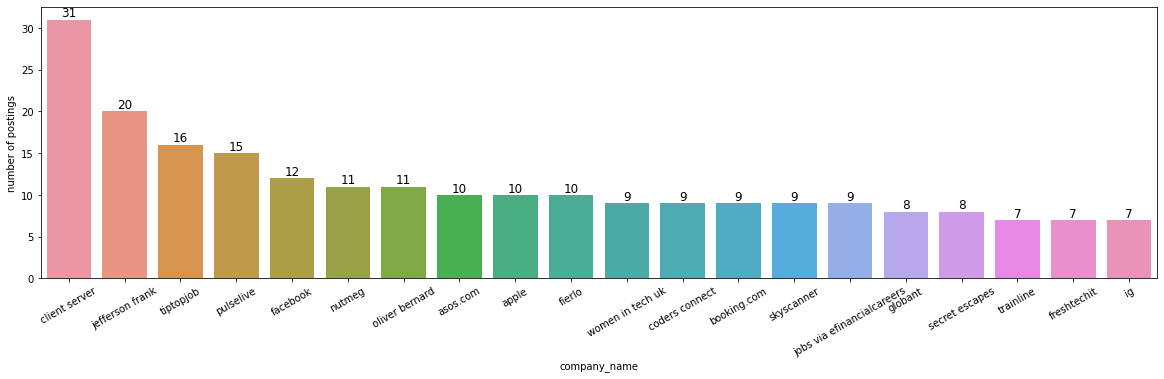

In [95]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Android Analysis

In [43]:
android_df = df[df['platform']=='android']
android_df.shape

(717, 16)

In [44]:
skills_count_android = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_android[skill] = counter
skills_count_android = pd.DataFrame(dict(sorted(skills_count_android.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_android.columns = ['skill', 'count']
skills_count_android = skills_count_android[skills_count_android['count']>0]
skills_count_android

,skill,count
0,android,683
1,kotlin,556
2,design,556
3,unity,431
4,java,428
5,engineering,341
6,git,330
7,testing,253
8,management,223
9,apis,210


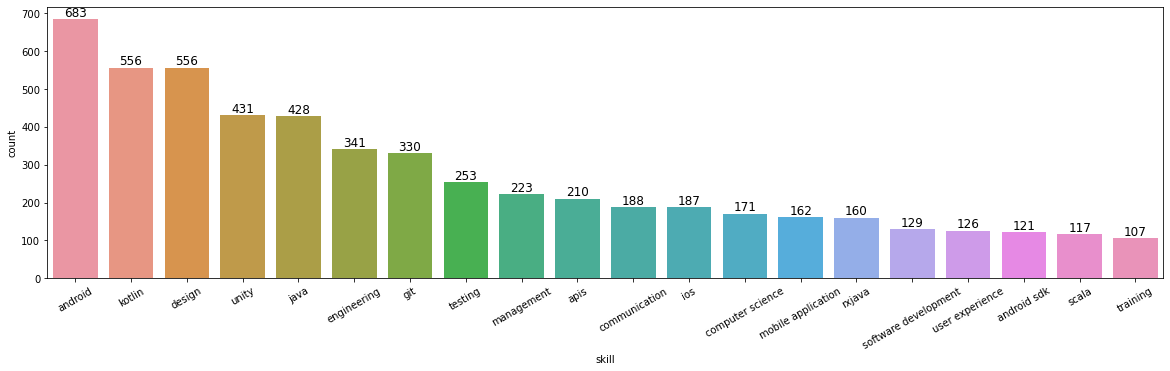

In [45]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies Android

In [46]:
top_companies_android = pd.DataFrame(android_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
top_companies_android

,company_name,number of postings
0,google,72
1,jefferson frank,50
2,client server,45
3,pulselive,27
4,asos.com,23
5,toptal,20
6,youview tv limited,19
7,zendesk,18
8,twitter,18
9,american express,17


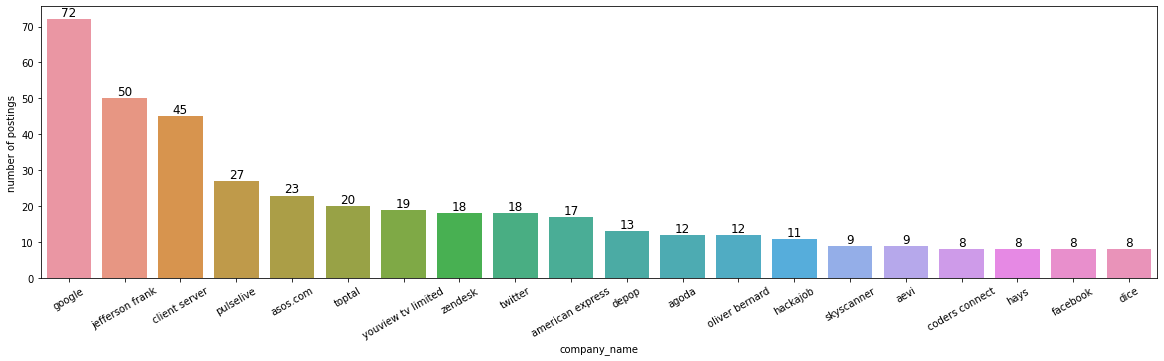

In [47]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()